In [742]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

from sklearn.model_selection import train_test_split
import seaborn as sns

In [743]:
data_train = pd.read_csv(r"C:\Users\rvikr\Downloads\train.csv")
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [993]:
data_test = pd.read_csv(r"C:\Users\rvikr\Downloads\test.csv")
data_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## Exploratory Data Analysis

### Steps to do:
#### drop columns that do not contribute to the prediction
#### Label Encoding of the catagorical data
#### Split the cabin column into three variables - deck, num, side
#### Fill in missing values 
       > home planet with the mode (if it is reasonable)
       > cryo sleep with mode
       > deck, num, side with the mode
       > Destination with mode (TRAPPIST-1e)
       > Age with mean
       > VIP with mode (FALSE)
       > The services with zeros
#### Check The heat map to decide what variables to choose for the model
#### Standardize the services from zero to 1 so that it doesnt affect the outcome much

In [745]:
### Analyze the data

In [746]:
data_train.shape

(8693, 14)

In [747]:
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [748]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [749]:
data_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [750]:
### Drop the irrelevent columns

In [751]:
data_train = data_train.drop('Name',axis = 1)
data_train = data_train.drop('PassengerId',axis = 1)

In [752]:
data_train.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [753]:
data_train.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [754]:
print("Number of zeros in the service classes: ")
print("Room Service: ",data_train.RoomService.value_counts()[0])
print("Food Court: ",data_train.FoodCourt.value_counts(0)[0])
print("Shopping Mall: ",data_train.ShoppingMall.value_counts(0)[0])
print("Spa: ",data_train.Spa.value_counts(0)[0])

Number of zeros in the service classes: 
Room Service:  5577
Food Court:  5456
Shopping Mall:  5587
Spa:  5324


In [755]:
#During analysis we found that some of the cabin elements are of float datatype
print(data_train[data_train['Cabin'].apply(lambda x: isinstance(x, float))])

#Turns out that they are NaN

     HomePlanet CryoSleep Cabin  Destination   Age    VIP  RoomService  \
15        Earth     False   NaN  TRAPPIST-1e  31.0  False         32.0   
93         Mars      True   NaN  TRAPPIST-1e  31.0  False          0.0   
103      Europa     False   NaN  TRAPPIST-1e  32.0  False          0.0   
222        Mars     False   NaN  TRAPPIST-1e  37.0  False        637.0   
227        Mars      True   NaN  TRAPPIST-1e  43.0  False          0.0   
...         ...       ...   ...          ...   ...    ...          ...   
8209     Europa     False   NaN  55 Cancri e  53.0  False          0.0   
8475     Europa     False   NaN  55 Cancri e  36.0   True        132.0   
8485     Europa      True   NaN  55 Cancri e  25.0  False          0.0   
8509      Earth      True   NaN  TRAPPIST-1e   1.0  False          0.0   
8656      Earth     False   NaN  TRAPPIST-1e  41.0  False          3.0   

      FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
15          0.0         876.0     0.0     0.0     

In [756]:
def spl_Deck(s):
    if(type(s) == float):
        return s
    return(s.split('/')[0])

def spl_num(s):
    if(type(s) == float):
        return s
    return(s.split('/')[1])

def spl_side(s):
    if(type(s) == float):
        return s
    return(s.split('/')[2])

### Splitting the cabin into three columns

In [757]:

data_train['Deck'] = data_train['Cabin'].apply(spl_Deck)
data_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F


In [758]:
data_train['Num'] = data_train['Cabin'].apply(spl_num)
data_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1


In [759]:
data_train['Side'] = data_train['Cabin'].apply(spl_side)
data_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [760]:
data_train = data_train.drop('Cabin', axis = 1)

### Replacing missing values

In [761]:
data_train['HomePlanet'] = data_train['HomePlanet'].fillna(data_train['HomePlanet'].mode()[0])

In [762]:
data_train['CryoSleep'] = data_train['CryoSleep'].fillna(data_train['CryoSleep'].mode()[0])

In [763]:
data_train['Destination'] = data_train['Destination'].fillna(data_train['Destination'].mode()[0])

In [764]:
data_train['VIP'] = data_train['VIP'].fillna('False')

In [765]:
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].mean())

In [766]:
data_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = data_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [767]:
print("Rechecking Number of zeros in the service classes: ")
print("Room Service: ",data_train.RoomService.value_counts()[0])
print("Food Court: ",data_train.FoodCourt.value_counts(0)[0])
print("Shopping Mall: ",data_train.ShoppingMall.value_counts(0)[0])
print("Spa: ",data_train.Spa.value_counts(0)[0])

Rechecking Number of zeros in the service classes: 
Room Service:  5758
Food Court:  5639
Shopping Mall:  5795
Spa:  5507


### checking characterstics of the newly created columns

In [768]:
data_train['Deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64

In [769]:
### checking characterstics of the newly created columns
data_train['Num'].value_counts()

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: Num, Length: 1817, dtype: int64

In [770]:
### checking characterstics of the newly created columns
data_train['Side'].value_counts()

S    4288
P    4206
Name: Side, dtype: int64

In [771]:
data_train['Deck'] = data_train['Deck'].fillna(data_train['Deck'].mode()[0])

In [772]:
data_train['Num'] = data_train['Num'].fillna(data_train['Num'].mode()[0])

In [773]:
data_train['Side'] = data_train['Side'].fillna(data_train['Side'].mode()[0])

In [774]:
data_train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Num             0
Side            0
dtype: int64

### Checking the unique values of the columns

In [776]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8693 non-null   object 
 12  Num           8693 non-null   object 
 13  Side          8693 non-null   object 
dtypes: bool(2), float64(6), object(6)
memory usage: 832.1+ KB


In [777]:
data_train.CryoSleep.unique()

array([False,  True])

In [778]:
data_train.VIP.unique()

array([False, True, 'False'], dtype=object)

In [779]:
data_train['VIP'] = data_train['VIP'].replace({'False':False})

In [780]:
data_train.VIP.unique()

array([False,  True])

In [781]:
data_train.Transported.unique()

array([False,  True])

In [782]:
#### label Encoding 

In [783]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [784]:
data_train['HomePlanet'] = le.fit_transform(data_train['HomePlanet'])
data_train['HomePlanet'].unique()

array([1, 0, 2])

In [785]:
data_train['Destination']= le.fit_transform(data_train['Destination'])
data_train['Destination'].unique()

array([2, 1, 0])

In [786]:
data_train['CryoSleep']= le.fit_transform(data_train['CryoSleep'])
data_train['CryoSleep'].unique()

array([0, 1], dtype=int64)

In [787]:
data_train['Side']= le.fit_transform(data_train['Side'])
data_train['Side'].unique()

array([0, 1])

In [788]:
data_train['VIP']= le.fit_transform(data_train['VIP'])
data_train['VIP'].unique()

array([0, 1], dtype=int64)

In [789]:
data_train['Deck']= le.fit_transform(data_train['Deck'])
data_train['Deck'].unique()

array([1, 5, 0, 6, 4, 3, 2, 7])

In [790]:
data_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1,1


In [791]:
data_encoded = pd.get_dummies(data_train, columns = ['Deck'])

In [792]:
data_encoded.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Num,Side,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,...,0,1,1,0,0,0,0,0,0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,...,0,1,1,0,0,0,0,0,0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,...,1,1,0,0,0,0,0,1,0,0


In [793]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int32  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int32  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Num           8693 non-null   object 
 12  Side          8693 non-null   int32  
 13  Deck_0        8693 non-null   uint8  
 14  Deck_1        8693 non-null   uint8  
 15  Deck_2        8693 non-null   uint8  
 16  Deck_3        8693 non-null   uint8  
 17  Deck_4        8693 non-null   uint8  
 18  Deck_5        8693 non-null 

In [794]:
data_encoded['Transported'] = data_encoded['Transported'].map({True: 1,
                                                              False: 0})

In [795]:
def apply_1(i):
    if i == 0:
        return 0
    else:
        return 1


In [796]:
data_encoded['RoomService'] = data_encoded['RoomService'].apply(apply_1)

In [797]:
data_encoded.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Num,Side,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7
0,1,0,2,39.0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,2,24.0,0,1,9.0,25.0,549.0,44.0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,2,58.0,1,1,3576.0,0.0,6715.0,49.0,...,0,1,1,0,0,0,0,0,0,0
3,1,0,2,33.0,0,0,1283.0,371.0,3329.0,193.0,...,0,1,1,0,0,0,0,0,0,0
4,0,0,2,16.0,0,1,70.0,151.0,565.0,2.0,...,1,1,0,0,0,0,0,1,0,0


In [798]:
data_encoded['FoodCourt'] = data_encoded['FoodCourt'].apply(apply_1)

In [799]:
data_encoded['ShoppingMall'] = data_encoded['ShoppingMall'].apply(apply_1)

In [800]:
data_encoded['Spa'] = data_encoded['Spa'].apply(apply_1)

In [801]:
data_encoded['VRDeck'] = data_encoded['VRDeck'].apply(apply_1)

In [802]:
data_encoded.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Num,Side,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7
0,1,0,2,39.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,2,24.0,0,1,1,1,1,1,...,0,1,0,0,0,0,0,1,0,0
2,1,0,2,58.0,1,1,1,0,1,1,...,0,1,1,0,0,0,0,0,0,0
3,1,0,2,33.0,0,0,1,1,1,1,...,0,1,1,0,0,0,0,0,0,0
4,0,0,2,16.0,0,1,1,1,1,1,...,1,1,0,0,0,0,0,1,0,0


In [803]:
data_encoded.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Num,Side,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7
0,1,0,2,39.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,2,24.0,0,1,1,1,1,1,...,0,1,0,0,0,0,0,1,0,0
2,1,0,2,58.0,1,1,1,0,1,1,...,0,1,1,0,0,0,0,0,0,0
3,1,0,2,33.0,0,0,1,1,1,1,...,0,1,1,0,0,0,0,0,0,0
4,0,0,2,16.0,0,1,1,1,1,1,...,1,1,0,0,0,0,0,1,0,0


In [804]:
data_encoded[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.337628,0.351317,0.333372,0.366502,0.346256
std,0.472928,0.477409,0.471445,0.481876,0.475803
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [805]:
data_encoded.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Num             0
Side            0
Deck_0          0
Deck_1          0
Deck_2          0
Deck_3          0
Deck_4          0
Deck_5          0
Deck_6          0
Deck_7          0
dtype: int64

<AxesSubplot:>

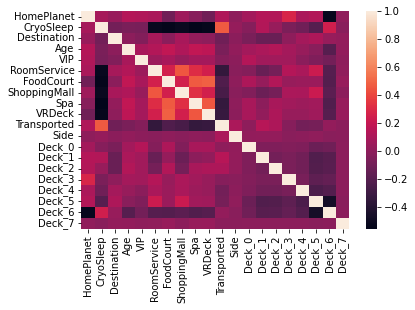

In [806]:
sns.heatmap(data_encoded.corr())

In [807]:
#Trial 1: Use all the variable to build the model

In [808]:
#Trial 2: Drop the columns with the least correlation with the tranported variable

In [839]:
data_drop = data_encoded.drop(['Deck_0','Deck_1','Deck_2','Deck_3','Deck_4','Deck_5','Deck_6','Deck_7','Num'], axis = 1)

In [827]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int32  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int32  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   int64  
 6   FoodCourt     8693 non-null   int64  
 7   ShoppingMall  8693 non-null   int64  
 8   Spa           8693 non-null   int64  
 9   VRDeck        8693 non-null   int64  
 10  Transported   8693 non-null   int64  
 11  Num           8693 non-null   object 
 12  Side          8693 non-null   int32  
dtypes: float64(1), int32(3), int64(8), object(1)
memory usage: 781.1+ KB


<AxesSubplot:>

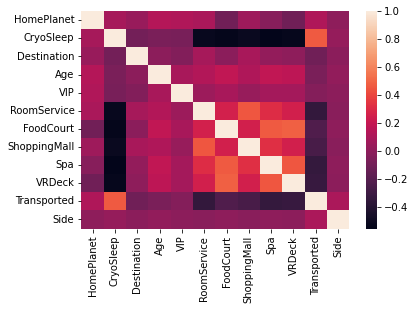

In [828]:
sns.heatmap(data_drop.corr())

## Trial 1: without standardizing the services

In [812]:
x_train,x_test,y_train,y_test = train_test_split(data_encoded.drop('Transported', axis = 1),data_encoded['Transported'],random_state= 65, test_size = 0.3)

In [813]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [814]:
y_pred = lr.predict(x_test)

In [815]:
accuracy_score(y_pred, y_test)

0.7400306748466258

## Trial 2: with Dropping the uncorrelated features

In [840]:
x_train,x_test,y_train,y_test = train_test_split(data_drop.drop('Transported', axis = 1),data_encoded['Transported'],random_state= 65, test_size = 0.2)

In [841]:
x_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Side
7328,0,0,1,48.0,0,0,0,1,1,0,0
7475,1,1,0,26.0,0,0,0,0,0,0,0
8476,1,1,2,55.0,0,0,0,0,0,0,0
3836,0,0,2,43.0,0,0,1,1,0,0,1
2507,1,0,0,36.0,1,1,1,0,1,1,0


In [842]:
x_test.shape

(1739, 11)

In [843]:
x_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Side
7063,0,0,1,25.00000,0,1,1,0,1,0,0
7764,2,0,2,28.82793,0,1,0,1,0,1,0
5158,0,1,2,15.00000,0,0,0,0,0,0,0
3656,1,1,0,37.00000,0,0,0,0,0,0,1
1940,0,0,0,29.00000,0,1,0,0,1,1,1


In [844]:
y_train.head()

7328    0
7475    1
8476    1
3836    1
2507    0
Name: Transported, dtype: int64

In [845]:
y_test.head()

7063    0
7764    0
5158    1
3656    1
1940    0
Name: Transported, dtype: int64

In [846]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [907]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)

In [910]:
y_pred = clf.predict(x_test)

In [911]:
accuracy_score(y_pred, y_test)

0.706728004600345

In [948]:
clf = DecisionTreeClassifier(max_depth=7,min_samples_split=10,random_state=42,criterion='entropy').fit(x_train,y_train)

In [949]:
y_pred = clf.predict(x_test)

In [950]:
accuracy_score(y_pred, y_test)

0.726279470960322

In [951]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [952]:
from sklearn.model_selection import GridSearchCV

In [953]:
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [955]:
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                              min_samples_split=10,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [957]:
model = grid_search.best_estimator_

In [958]:
y_pred = model.predict(x_test)

In [959]:
accuracy_score(y_pred, y_test)

0.726279470960322

### Applying the data Cleaning process to the test data

In [864]:
data_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [865]:
data_test = data_test.drop('Name',axis = 1)
data_test = data_test.drop('PassengerId',axis = 1)

In [866]:
data_test.Destination.value_counts()

TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

In [867]:
data_test.VIP.value_counts()

False    4110
True       74
Name: VIP, dtype: int64

In [868]:
print("Number of zeros in the service classes: ")
print("Room Service: ",data_test.RoomService.value_counts()[0])
print("Food Court: ",data_test.FoodCourt.value_counts(0)[0])
print("Shopping Mall: ",data_test.ShoppingMall.value_counts(0)[0])
print("Spa: ",data_test.Spa.value_counts(0)[0])

Number of zeros in the service classes: 
Room Service:  2726
Food Court:  2690
Shopping Mall:  2744
Spa:  2611


In [869]:
#During analysis we found that some of the cabin elements are of float datatype
print(data_test[data_test['Cabin'].apply(lambda x: isinstance(x, float))])

#Turns out that they are NaN

     HomePlanet CryoSleep Cabin  Destination   Age    VIP  RoomService  \
18       Europa     False   NaN  TRAPPIST-1e  29.0  False          0.0   
99        Earth       NaN   NaN  TRAPPIST-1e  22.0  False          0.0   
135      Europa      True   NaN  TRAPPIST-1e  47.0  False          0.0   
147       Earth      True   NaN  55 Cancri e  18.0  False          0.0   
180        Mars     False   NaN  TRAPPIST-1e  37.0  False        731.0   
...         ...       ...   ...          ...   ...    ...          ...   
4209     Europa       NaN   NaN  TRAPPIST-1e  41.0  False          0.0   
4248       Mars      True   NaN  TRAPPIST-1e  24.0  False          0.0   
4249       Mars      True   NaN  TRAPPIST-1e  17.0  False          0.0   
4258      Earth      True   NaN  TRAPPIST-1e  14.0  False          0.0   
4273      Earth     False   NaN  TRAPPIST-1e  42.0  False          0.0   

      FoodCourt  ShoppingMall     Spa  VRDeck  
18       7708.0         243.0   569.0   343.0  
99          0.0

In [870]:
def spl_Deck(s):
    if(type(s) == float):
        return s
    return(s.split('/')[0])

def spl_num(s):
    if(type(s) == float):
        return s
    return(s.split('/')[1])

def spl_side(s):
    if(type(s) == float):
        return s
    return(s.split('/')[2])

### Splitting the cabin into three columns

In [871]:

data_test['Deck'] = data_test['Cabin'].apply(spl_Deck)
data_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F


In [872]:
data_test['Num'] = data_test['Cabin'].apply(spl_num)
data_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5


In [873]:
data_test['Side'] = data_test['Cabin'].apply(spl_side)
data_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S


In [874]:
data_test = data_test.drop('Cabin', axis = 1)

### Replacing missing values

In [875]:
data_test['HomePlanet'] = data_test['HomePlanet'].fillna(data_test['HomePlanet'].mode()[0])

In [876]:
data_test['CryoSleep'] = data_test['CryoSleep'].fillna(data_test['CryoSleep'].mode()[0])

In [877]:
data_test['Destination'] = data_test['Destination'].fillna(data_test['Destination'].mode()[0])

In [878]:
data_test['VIP'] = data_test['VIP'].fillna('False')

In [879]:
data_test['Age'] = data_test['Age'].fillna(data_test['Age'].mean())

In [880]:
data_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = data_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [881]:
print("Rechecking Number of zeros in the service classes: ")
print("Room Service: ",data_train.RoomService.value_counts()[0])
print("Food Court: ",data_train.FoodCourt.value_counts(0)[0])
print("Shopping Mall: ",data_train.ShoppingMall.value_counts(0)[0])
print("Spa: ",data_train.Spa.value_counts(0)[0])

Rechecking Number of zeros in the service classes: 
Room Service:  5758
Food Court:  5639
Shopping Mall:  5795
Spa:  5507


### checking characterstics of the newly created columns

In [882]:
data_test['Deck'].value_counts()

F    1445
G    1222
E     447
B     362
C     355
D     242
A      98
T       6
Name: Deck, dtype: int64

In [883]:
### checking characterstics of the newly created columns
data_test['Num'].value_counts()

4       21
31      18
197     16
294     16
228     14
        ..
1170     1
904      1
1174     1
356      1
1503     1
Name: Num, Length: 1505, dtype: int64

In [884]:
### checking characterstics of the newly created columns
data_test['Side'].value_counts()

S    2093
P    2084
Name: Side, dtype: int64

In [885]:
data_test['Deck'] = data_test['Deck'].fillna(data_test['Deck'].mode()[0])

In [886]:
data_test['Num'] = data_test['Num'].fillna(data_test['Num'].mode()[0])

In [887]:
data_test['Side'] = data_test['Side'].fillna(data_test['Side'].mode()[0])

In [888]:
data_test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Num             0
Side            0
dtype: int64

### Checking the unique values of the columns

In [889]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   bool   
 2   Destination   4277 non-null   object 
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   object 
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
 10  Deck          4277 non-null   object 
 11  Num           4277 non-null   object 
 12  Side          4277 non-null   object 
dtypes: bool(1), float64(6), object(6)
memory usage: 405.3+ KB


In [890]:
data_test.CryoSleep.unique()

array([ True, False])

In [891]:
data_test.VIP.unique()

array([False, 'False', True], dtype=object)

In [892]:
data_test['VIP'] = data_test['VIP'].replace({'False':False})

In [893]:
data_test.VIP.unique()

array([False,  True])

In [895]:
#### label Encoding 

In [896]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [897]:
data_test['HomePlanet'] = le.fit_transform(data_test['HomePlanet'])
data_test['HomePlanet'].unique()

array([0, 1, 2])

In [898]:
data_test['Destination']= le.fit_transform(data_test['Destination'])
data_test['Destination'].unique()

array([2, 0, 1])

In [970]:
data_test['CryoSleep']= le.fit_transform(data_test['CryoSleep'])
data_test['CryoSleep'].unique()

array([1, 0], dtype=int64)

In [971]:
data_test['Side']= le.fit_transform(data_test['Side'])
data_test['Side'].unique()

array([1, 0])

In [972]:
data_test['VIP']= le.fit_transform(data_test['VIP'])
data_test['VIP'].unique()

array([0, 1], dtype=int64)

In [973]:
data_test['Deck']= le.fit_transform(data_test['Deck'])
data_test['Deck'].unique()

array([6, 5, 2, 1, 3, 4, 0, 7])

In [974]:
data_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,6,3,1
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,5,4,1
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,2,0,1
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,2,1,1
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,5,5,1


In [975]:
data_encoded = pd.get_dummies(data_test, columns = ['Deck'])

In [976]:
data_encoded.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,Side,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,3,1,0,0,0,0,0,0,1,0
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,4,1,0,0,0,0,0,1,0,0
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,1,0,0,1,0,0,0,0,0
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,5,1,0,0,0,0,0,1,0,0


In [977]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   int32  
 1   CryoSleep     4277 non-null   int64  
 2   Destination   4277 non-null   int32  
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   int64  
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
 10  Num           4277 non-null   object 
 11  Side          4277 non-null   int32  
 12  Deck_0        4277 non-null   uint8  
 13  Deck_1        4277 non-null   uint8  
 14  Deck_2        4277 non-null   uint8  
 15  Deck_3        4277 non-null   uint8  
 16  Deck_4        4277 non-null   uint8  
 17  Deck_5        4277 non-null   uint8  
 18  Deck_6        4277 non-null 

In [978]:
def apply_1(i):
    if i == 0:
        return 0
    else:
        return 1


In [979]:
data_encoded['RoomService'] = data_encoded['RoomService'].apply(apply_1)

In [980]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   int32  
 1   CryoSleep     4277 non-null   int64  
 2   Destination   4277 non-null   int32  
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   int64  
 5   RoomService   4277 non-null   int64  
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
 10  Num           4277 non-null   object 
 11  Side          4277 non-null   int32  
 12  Deck_0        4277 non-null   uint8  
 13  Deck_1        4277 non-null   uint8  
 14  Deck_2        4277 non-null   uint8  
 15  Deck_3        4277 non-null   uint8  
 16  Deck_4        4277 non-null   uint8  
 17  Deck_5        4277 non-null   uint8  
 18  Deck_6        4277 non-null 

In [981]:
data_encoded.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,Side,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7
0,0,1,2,27.0,0,0,0.0,0.0,0.0,0.0,3,1,0,0,0,0,0,0,1,0
1,0,0,2,19.0,0,0,9.0,0.0,2823.0,0.0,4,1,0,0,0,0,0,1,0,0
2,1,1,0,31.0,0,0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0
3,1,0,2,38.0,0,0,6652.0,0.0,181.0,585.0,1,1,0,0,1,0,0,0,0,0
4,0,0,2,20.0,0,1,0.0,635.0,0.0,0.0,5,1,0,0,0,0,0,1,0,0


In [982]:
data_encoded['FoodCourt'] = data_encoded['FoodCourt'].apply(apply_1)

In [983]:
data_encoded['ShoppingMall'] = data_encoded['ShoppingMall'].apply(apply_1)

In [984]:
data_encoded['Spa'] = data_encoded['Spa'].apply(apply_1)

In [985]:
data_encoded['VRDeck'] = data_encoded['VRDeck'].apply(apply_1)

In [986]:
data_encoded.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,Side,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7
0,0,1,2,27.0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,1,0
1,0,0,2,19.0,0,0,1,0,1,0,4,1,0,0,0,0,0,1,0,0
2,1,1,0,31.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,1,0,2,38.0,0,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0
4,0,0,2,20.0,0,1,0,1,0,0,5,1,0,0,0,0,0,1,0,0


In [988]:
data_drop = data_encoded.drop(['Deck_0','Deck_1','Deck_2','Deck_3','Deck_4','Deck_5','Deck_6','Deck_7','Num'], axis = 1)

In [989]:
data_drop.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Side
0,0,1,2,27.0,0,0,0,0,0,0,1
1,0,0,2,19.0,0,0,1,0,1,0,1
2,1,1,0,31.0,0,0,0,0,0,0,1
3,1,0,2,38.0,0,0,1,0,1,1,1
4,0,0,2,20.0,0,1,0,1,0,0,1


In [990]:
res = model.predict(data_drop)

In [1012]:
res

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [1013]:
data_test['Transported'] = res.tolist()

In [1014]:
final = data_test[['PassengerId','Transported']]

In [1015]:
final.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,0
4,0023_01,0


In [1019]:
def fun(x):
    if x == 1:
         return True
    else:
        return False

In [1022]:
final['Transported'] = final['Transported'].apply(fun)

C:\Users\rvikr\AppData\Local\Temp\ipykernel_21712\1716439022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Transported'] = final['Transported'].apply(fun)


In [1023]:
final

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [1025]:
final.to_csv(r"C:\Users\rvikr\Downloads\SpaceTitanicPredictions.csv", index = False)